# **22MIS0103 DIVYA V**

# **BASE CODE — 2 Qubit Setup**

In [1]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet
!pip install pylatexenc --quiet

# ==========================================
# BASE: Two-Qubit Circuit Example
# ==========================================
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 2: Apply X gate on qubit 0 → creates |10>
qc.x(0)

# Step 3: Measure both qubits
qc.measure([0, 1], [0, 1])

# Step 4: Run simulation
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 5: Display circuit and results
print("Measurement Results:", counts)
qc.draw('text')
plot_histogram(counts)
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Measurement Results: {'01': 1024}


# **Task 1: Apply Hadamard on Both Qubits**



In [2]:
qc_h = QuantumCircuit(2, 2)
qc_h.h(0)
qc_h.h(1)
qc_h.measure([0, 1], [0, 1])

sim = AerSimulator()
compiled_h = transpile(qc_h, sim)
job_h = sim.run(compiled_h, shots=1024)
res_h = job_h.result()
counts_h = res_h.get_counts()

print("Hadamard on both qubits:", counts_h)
qc_h.draw('text')
plot_histogram(counts_h)
plt.show()


Hadamard on both qubits: {'01': 265, '11': 254, '10': 273, '00': 232}


# **TASK 2 — Swap Qubit Roles (Apply X on 2nd Qubit)**

In [3]:
qc_swap = QuantumCircuit(2, 2)
qc_swap.x(1)
qc_swap.measure([0, 1], [0, 1])

sim = AerSimulator()
compiled_swap = transpile(qc_swap, sim)
job_swap = sim.run(compiled_swap, shots=1024)
res_swap = job_swap.result()
counts_swap = res_swap.get_counts()

print("Swap Roles (X on qubit 1):", counts_swap)
qc_swap.draw('text')
plot_histogram(counts_swap)
plt.show()


Swap Roles (X on qubit 1): {'10': 1024}


# **TASK 3 — Add a CNOT (Entanglement Test)**

In [4]:
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)
qc_ent.cx(0, 1)
qc_ent.measure([0, 1], [0, 1])

sim = AerSimulator()
compiled_ent = transpile(qc_ent, sim)
job_ent = sim.run(compiled_ent, shots=1024)
res_ent = job_ent.result()
counts_ent = res_ent.get_counts()

print("Entangled State (Bell Pair):", counts_ent)
qc_ent.draw('text')
plot_histogram(counts_ent)
plt.show()


Entangled State (Bell Pair): {'00': 507, '11': 517}


# **TASK 4 — Increase Measurement Shots**

In [6]:
qc_shots = QuantumCircuit(2, 2)
qc_shots.h(0)
qc_shots.h(1)
qc_shots.measure([0, 1], [0, 1])

sim = AerSimulator()
compiled_shots = transpile(qc_shots, sim)
job_shots = sim.run(compiled_shots, shots=4096)
res_shots = job_shots.result()
counts_shots = res_shots.get_counts()

print("With 4096 shots:", counts_shots)
qc_shots.draw('text')
plot_histogram(counts_shots)
plt.show()


With 4096 shots: {'01': 1065, '11': 1027, '00': 983, '10': 1021}


# **TASK 5 — Add Bloch Visualization**

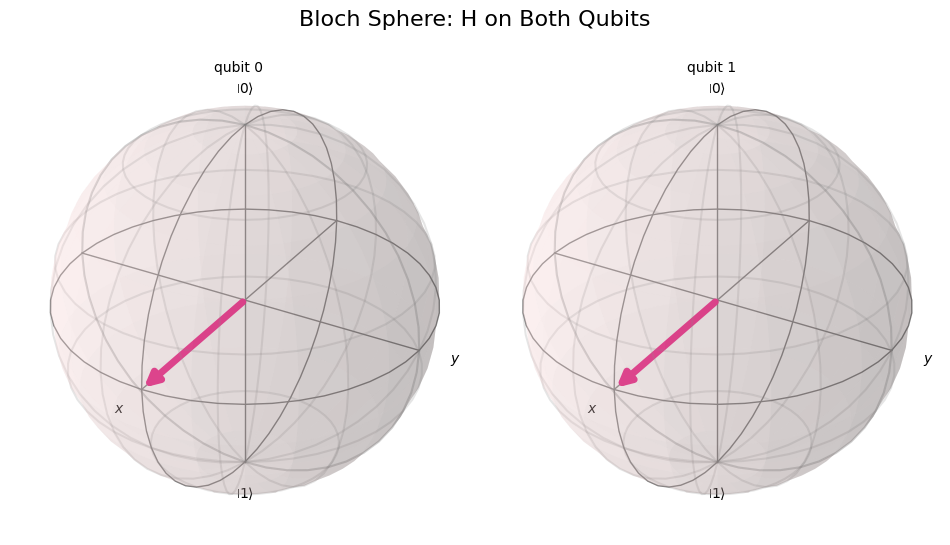

In [7]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# Build circuit before measurement for state visualization
qc_bloch = QuantumCircuit(2)
qc_bloch.h(0)
qc_bloch.h(1)

state = Statevector.from_instruction(qc_bloch)
display(plot_bloch_multivector(state, title="Bloch Sphere: H on Both Qubits"))
